<a href="https://colab.research.google.com/github/hamnakhan11/hamna/blob/main/Heart_desease_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:

df=pd.read_csv('/content/heart_disease_uci.csv')

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in the DataFrame

In [ ]:
# using df.info() to check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# checking the data shape of dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 920 rows and 16 columns.


In [ ]:
# checking the data shape of dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 920 rows and 16 columns.


In [ ]:
# statistical summary of the age column
df['age'].describe()

,age
count,920.000000
mean,53.510870
std,9.424685
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


In [ ]:
df['age'].min(),df['age'].max()

(28, 77)

Text(0.5, 1.0, 'Age Distribution')

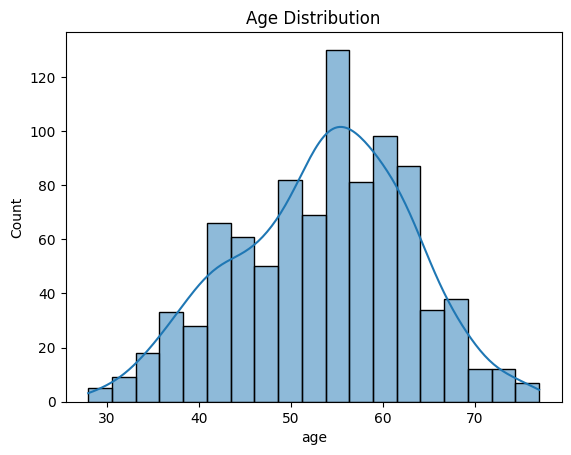

In [ ]:
# draw a histogram of the 'age' column to check the distribution of ages
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

Mean 53.51086956521739
Median 54.0
Mode 54


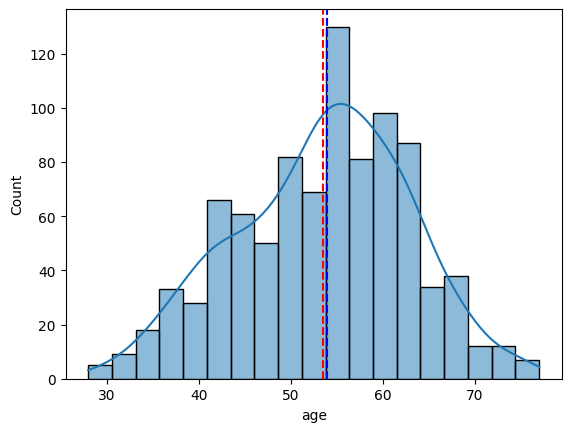

In [ ]:
# ploting mean , median and mode of age

sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df['age'].median(), color='g', linestyle='--', label='Median')
plt.axvline(df['age'].mode()[0], color='b', linestyle='--', label='Mode')

print("Mean",df['age'].mean())
print("Median",df['age'].median())
print("Mode",df['age'].mode()[0])

In [ ]:
# find values of sex column
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [ ]:
# find value counts of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
        41      7
        49      7
        50      7
        55      7
        58      7
        45      6
        53      6
        57      6
        63      6
        64      6
        52      5
        56      5
        60      5
        37      4
        46      4
        47      4
        61      4
        65      4
        66      4
        35      3
        38      3
        39      3
        42      3
        44      3
        59      3
        67      3
        71      3
        34      2
        30      1
        31      1
        32      1
        33      1
        40      1
        68      1
        69      1
        73      1
        74      1
        76      1
Male    54     36
        58     36
        55     34
        56     33
        57     32
        59     32
        52     31
        53     27
        60     27
        61     27
        62     25
        51     24
        63     24
        48     22
        46     20
        50     18
        41     17
        65     17
        44     16
        64     16
        42     15
        43     15
        47     15
        49     15
        38     13
        39     12
        40     12
        45     12
        67     12
        69     12
        66      9
        68      9
        35      8
        37      7
        70      7
        36      6
        74      6
        34      5
        32      4
        72      4
        29      3
        75      3
        71      2
        77      2
        28      1
        31      1
        33      1
        76      1
Name: count, dtype: int64

In [ ]:
# calculate percentage of male and female value counts in the dataset

male_count =726

female_count = 194

total_count=male_count+female_count


# calculate percentage

male_percentage=(male_count/total_count)*100
female_percentage=(female_count/total_count)*100

print(f"The percentage of males in the data {male_percentage:.2f} % and females percentage is {female_percentage:.2f}%")

# difference

difference_percentage = ((male_count-female_count)/female_count) * 100
print(f"Males are  {difference_percentage:.2f}% more than females in the dataset.")

The percentage of males in the data 78.91 % and females percentage is 21.09%
Males are  274.23% more than females in the dataset.


In [ ]:

# Display the columns in the DataFrame
print("Available columns in the DataFrame:")
print(df.columns)

Available columns in the DataFrame:
Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
df.columns.value_counts()

,count
id,1
age,1
sex,1
dataset,1
cp,1
trestbps,1
chol,1
fbs,1
restecg,1
thalch,1


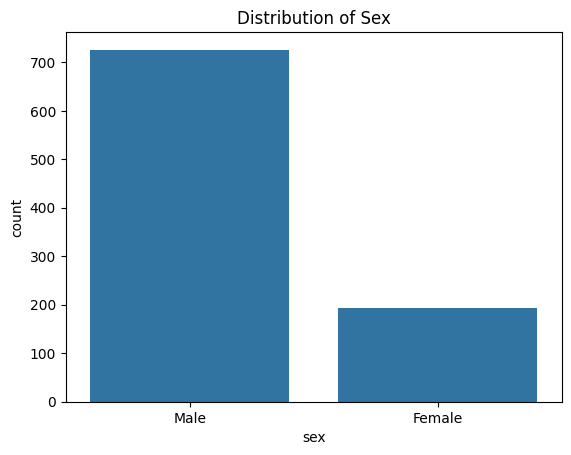

In [ ]:
sns.countplot(x='sex', data=df)
plt.title('Distribution of Sex')
plt.show()

In [ ]:
# print the values of all columns in the dataframe
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
# make a plot of age col

fig=px.histogram(data_frame=df,x='age',barmode='group')
fig.show()

In [ ]:
# print the values of all columns in the dataframe
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
# print the values of all columns in the dataframe
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
